In [319]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings("ignore")

In [320]:
# read data 
data = pd.read_csv("diamonds.csv.")

In [321]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(data.drop(columns=["Unnamed: 0","price","cut","color","clarity"]))
y = pd.DataFrame(data["price"])

#### **To Check Linearity Of Data Features**

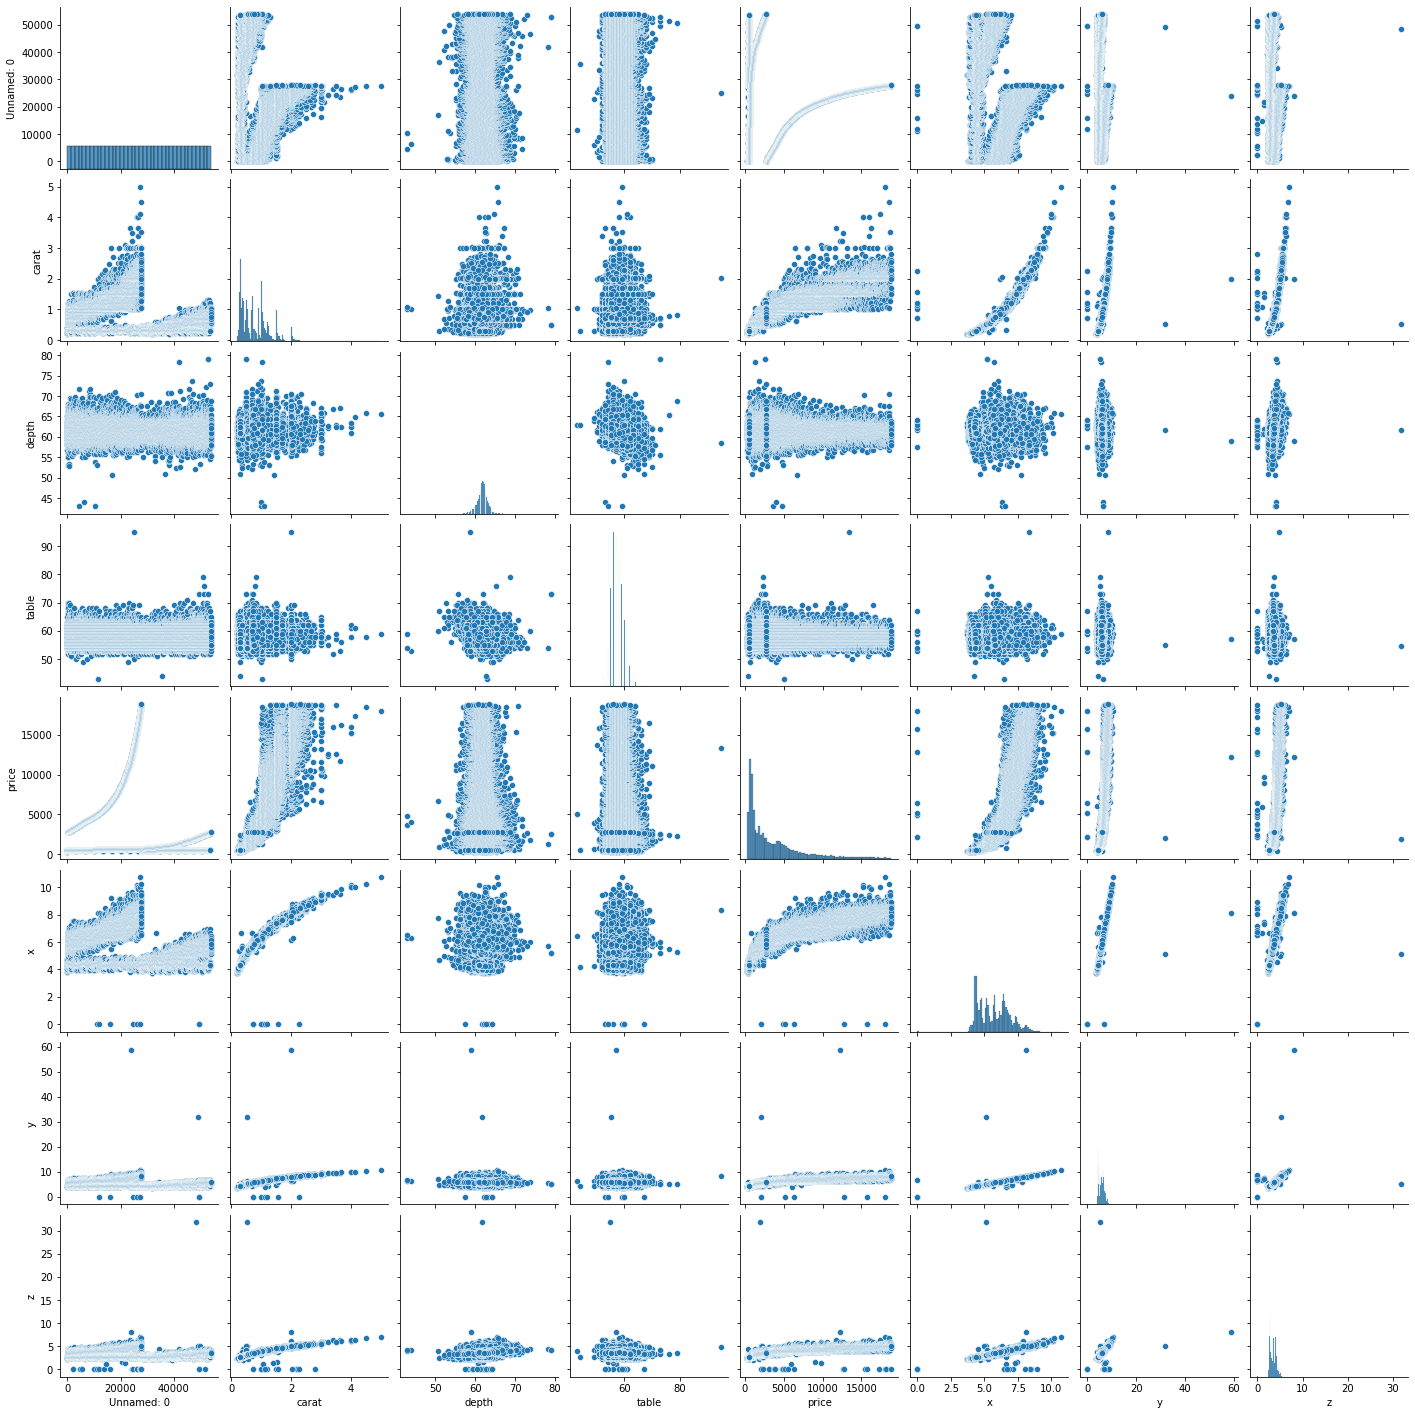

In [322]:
# To Check Linearity of Data Features 
# plt.title("To Check Linearity")
sns.pairplot(data) 
plt.show()

# OR
# # To Check Linearity of Data Features 
# sns.pairplot(data,diag_kind="kde",height=20.2) 
# plt.show()

#### **Assumption 02 : NO or Little Multicollinearity**

In [323]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i] : variance_inflation_factor(X.values,i) for i in range(1, X.shape[1])}

{'depth': 515.1462735271707,
 'table': 500.595340826562,
 'x': 1284.9498282531226,
 'y': 530.9982176414204,
 'z': 540.6773490620917}

In [324]:
X.drop(columns=["x"],inplace=True)

In [325]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i] : variance_inflation_factor(X.values,i) for i in range(1, X.shape[1])}

{'depth': 515.0924756040616,
 'table': 436.2501228598208,
 'y': 357.47220097394313,
 'z': 418.6093927576819}

In [326]:
X.drop(columns=["depth"],inplace=True)

In [327]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i] : variance_inflation_factor(X.values,i) for i in range(1, X.shape[1])}

{'table': 139.07741235174234, 'y': 357.05894410377937, 'z': 338.7920972467574}

In [328]:
X.drop(columns=["y"],inplace=True)

In [329]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i] : variance_inflation_factor(X.values,i) for i in range(1, X.shape[1])}

{'table': 106.85543040209596, 'z': 228.75798436042302}

In [330]:
X.drop(columns=["z"],inplace=True)

In [331]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i] : variance_inflation_factor(X.values,i) for i in range(1, X.shape[1])}

{'table': 3.9101139497844324}

#### **Training Testing Data Split**

In [332]:
X.shape,y.shape

((53940, 2), (53940, 1))

In [333]:
y = pd.DataFrame(y,columns=["price"])

In [334]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=1)

In [335]:
print(f"X_Train : {X_train.shape[0]}\nX_Test {X_test.shape[0]}\ny_train : {y_train.shape[0]} \ny_test : {y_test.shape[0]}")

X_Train : 40455
X_Test 13485
y_train : 40455 
y_test : 13485


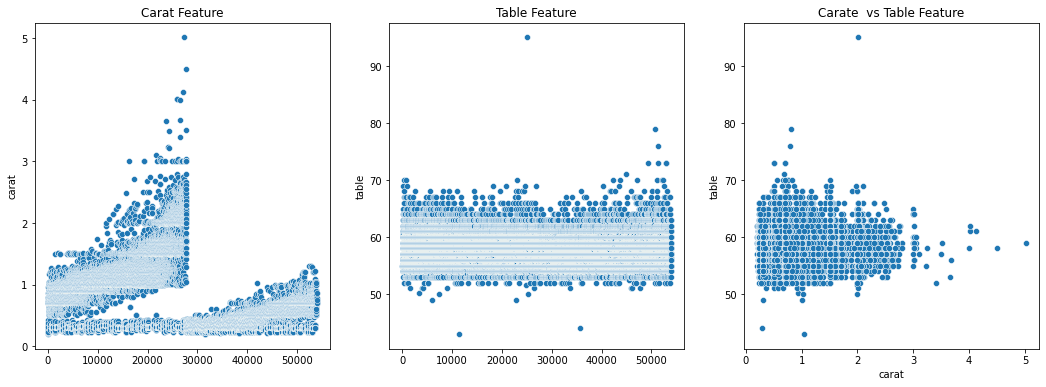

In [336]:
plt.figure(figsize=[18,6])
plt.subplot(1,3,1)
plt.title("Carat Feature")
sns.scatterplot(data=X["carat"])
 
plt.subplot(1,3,2)
plt.title("Table Feature")
sns.scatterplot(data=X["table"])

 
plt.subplot(1,3,3)
plt.title("Carate  vs Table Feature")
sns.scatterplot(y=X["table"],x=X["carat"])
plt.show()


#### **Scaler The only Training Data**

In [337]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

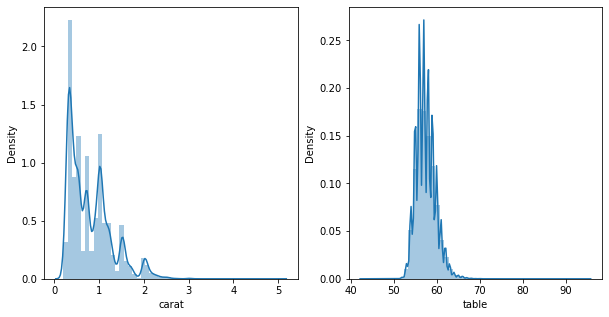

In [338]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.distplot(X_train["carat"])
plt.subplot(1,2,2)
sns.distplot(X_train["table"])
plt.show()

In [339]:
X_train = scaler.fit_transform(X_train)

In [340]:
X_train = pd.DataFrame(X_train,columns=["carat","table"])

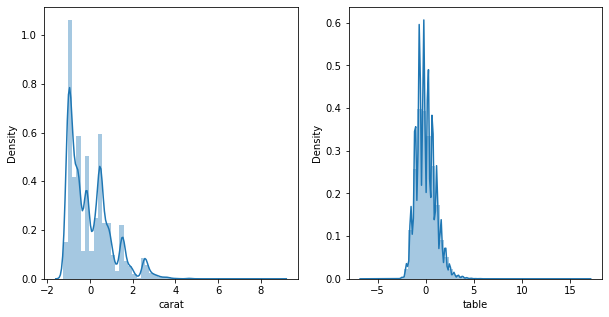

In [341]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.distplot(X_train["carat"])
plt.subplot(1,2,2)
sns.distplot(X_train["table"])
plt.show()

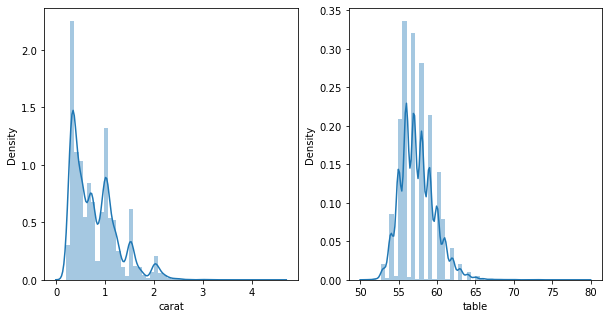

In [342]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.distplot(X_test["carat"])
plt.subplot(1,2,2)
sns.distplot(X_test["table"])
plt.show()

In [343]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=["carat","table"])

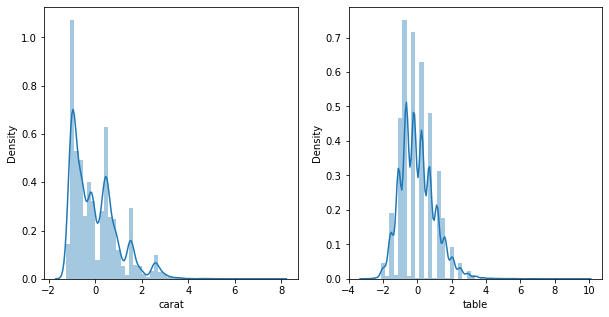

In [344]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.distplot(X_test["carat"])
plt.subplot(1,2,2)
sns.distplot(X_test["table"])
plt.show()

#### **Train The Model**

In [345]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model 

LinearRegression()

In [346]:
# Train The Model 
model.fit(X_train,y_train)

LinearRegression()

In [347]:
print(f"Model Intercept : {model.intercept_} \nModel Independent Variable : {X_train.columns} \nModel Coefficient : {model.coef_}")

Model Intercept : [3939.28923495] 
Model Independent Variable : Index(['carat', 'table'], dtype='object') 
Model Coefficient : [[3723.76093953 -166.47609424]]


#### **Model Evaluation**

In [348]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

In [349]:
y_pred_test = model.predict(X_test) 

In [350]:
print(f"Mean Square Error is {mean_squared_error(y_test,y_pred_test)} \nMean Absolute Error is {mean_absolute_error(y_test,y_pred_test)} \nR_squared is {r2_score(y_test,y_pred_test)}")

rsq =r2_score(y_test,y_pred_test)

adj_r2 = [1-(1-rsq)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)]
print(f"Adjusted R2 is : {adj_r2}")

Mean Square Error is 2300314.8952925624 
Mean Absolute Error is 997.6655664530131 
R_squared is 0.8512319206311431
Adjusted R2 is : [0.8512098514901597]


#### **Assumption 03 : Homoscedasticity - Constant Variance** 

    * Plot the Graph X = Y_test and Y is Residuals(error between Y_actual - Y_predicted) if these plot having some pattern then we need to doing some feature engineering or choose incorrect algorithm 

In [351]:
residuals = y_test - y_pred_test

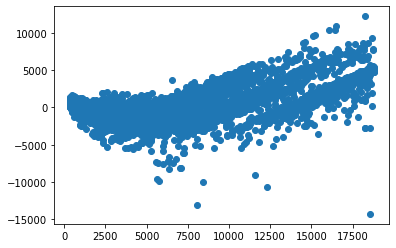

In [352]:
# sns.scatterplot(data = residuals)
plt.scatter(x=y_test,y=residuals)
# If this plot c
plt.show()

#### **Assumption 04 : No Autocorrelation Of Error**

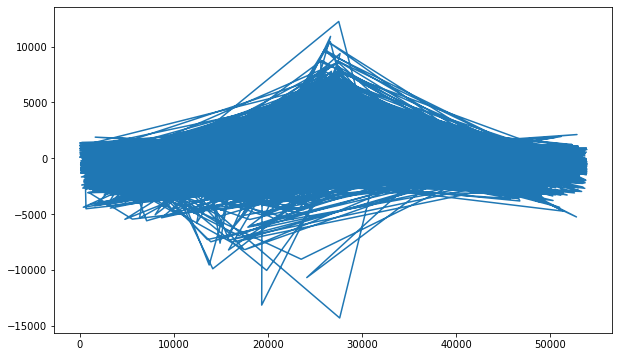

In [353]:
plt.figure(figsize=[10,6])
plt.plot(residuals)
plt.show()

#### **Assumption 05 : Residual Normality**

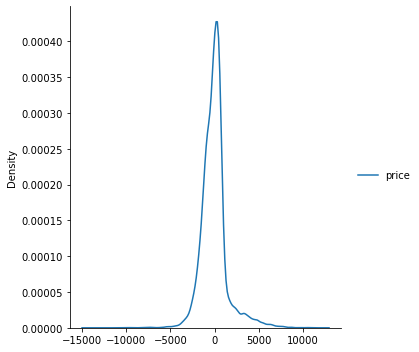

In [354]:
sns.displot(data=residuals,kind="kde")

In [355]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [356]:
data.table.unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

#### **Predicate the Price For carat = 2.11 and table is 70**

In [363]:
data = [[70,2.11]]
table = scaler.transform(data) 
print(f"Price Of the Given Diamond is {np.round(model.predict(table),2)}")

Price Of the Given Diamond is [[548901.11]]
